In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
%config IPCompleter.greedy=True

## Reading data from file

In [47]:
from collections import Counter

data = pd.read_csv("20151219.txt", sep = "\t", header = None)
data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(data["attack_flag"]))

Counter({-1: 149915, 1: 67713})


## Transform to binary

In [48]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(data["attack_flag"]))

Counter({1: 149915, 0: 67713})


## Drop additional features

In [49]:
# slice dataset, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(217628, 24)
(217628, 21)


1    149915
0     67713
Name: attack_flag, dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 18 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [51]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,6338,17989,udp
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,OTH,1,11,0,icmp
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,14015,17989,udp
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,44074,53,udp
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,49263,25,tcp
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,58398,25,tcp
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,1.0,1.0,1.0,S0,1,55373,23,tcp
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,33244,25,tcp
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,47476,25,tcp
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,10106,17989,udp


In [52]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000
mean,0.855259,56.899333,122.064555,2.952263,0.417481,0.089564,0.542215,29.491720,31.876730,0.071694,0.066464,0.146028,0.688859,34292.130006,3550.084736
std,3.085410,519.846915,748.123612,5.519918,0.491905,0.284547,0.467622,44.351499,43.928101,0.256081,0.248495,0.350052,0.462961,19708.835701,10869.634486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12375.000000,25.000000
50%,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,39682.000000,53.000000
75%,0.013333,45.000000,61.000000,5.000000,1.000000,0.000000,1.000000,96.000000,96.000000,0.000000,0.000000,0.000000,1.000000,50473.000000,1433.000000
max,563.012764,88066.000000,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65498.000000


In [53]:
# removing NaNs
data = data.dropna()
data.shape

(217628, 18)

In [54]:
data["Conn state"].value_counts(dropna=False)

S0        127464
SF         59944
RSTO       11476
OTH         8640
REJ         7998
RSTRH        733
RSTOS0       634
SHR          381
RSTR         304
S1            52
SH             2
Name: Conn state, dtype: int64

In [55]:
data["service"].value_counts(dropna=False)

other    126080
dns       61990
sip       16519
ssh       11518
snmp        665
smtp        495
rdp         328
dhcp         20
http         11
ssl           2
Name: service, dtype: int64

In [56]:
data["proto"].value_counts(dropna=False)

tcp     119162
udp      93548
icmp      4918
Name: proto, dtype: int64

# a bit of feature engineering

## port numbers classification

In [57]:
t1 = 1023  # well-known port numbers
t2 = 49151 # registered ports
t3 = 65535 # client ports

def wk(data_row):
    if (data_row["src port"] <= t1): 
        value = 1
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def reg(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 1
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def cli(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 1
    return value

data["well-known src pool"] = data.apply(wk, axis=1)
data["registered src pool"] = data.apply(reg, axis=1)
data["cli src pool"] = data.apply(cli, axis=1)

In [58]:
print(Counter(data["well-known src pool"]))
print(Counter(data["registered src pool"]))
print(Counter(data["cli src pool"]))

Counter({0: 211216, 1: 6412})
Counter({1: 150534, 0: 67094})
Counter({0: 156946, 1: 60682})


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Data columns (total 21 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [60]:
# data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool", "well-known dst pool", "registered dst pool", "cli dst pool"]].head(30)
data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool"]].head(30)

,src port,dst port,well-known src pool,registered src pool,cli src pool
0,40061,111,0,1,0
1,53488,80,0,0,1
2,35051,23,0,1,0
3,1408,445,0,1,0
4,55244,995,0,0,1
5,44544,995,0,1,0
6,50678,5900,0,0,1
7,35051,23,0,1,0
8,50678,5900,0,0,1
9,50678,5900,0,0,1


## Change port number info to categorical

In [61]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)
data['src port'].nunique()
data['dst port'].nunique()

thresh1 = 125
thresh2 = 125
counts1 = data['src port'].value_counts()
counts2 = data['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
data = pd.concat([data, pd.get_dummies(data["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
data = pd.concat([data, pd.get_dummies(data["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [62]:
data.shape

(217628, 214)

## Hot one encoding

In [63]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,...,0,0,0,0,0,1,0,0,0,0
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Columns: 238 entries, conn len to state_SHR
dtypes: float64(7), int64(9), object(5), uint8(217)
memory usage: 81.6+ MB


## Plot function definition

In [65]:
# plotting method definition

def plot_stats(stat, name, width, rot):
    fig, ax = plt.subplots(figsize=(width, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=rot)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

## Dataset split

In [66]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)

data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

sampled_data = data.loc[range(150000), :]

train_alg, validate_alg, test_alg = np.split(sampled_data, [int(.7*len(sampled_data)), int(.85*len(sampled_data))])

train_alg = train_alg.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
validate_alg = validate_alg.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
test_alg = test_alg.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)

train_alg = train_alg.sample(frac=1)
validate_alg = validate_alg.sample(frac=1)
test_alg = test_alg.sample(frac=1)

y_train_alg = train_alg.loc[:, "attack_flag"].values.ravel()
X_train_alg = train_alg.drop(["attack_flag"], axis=1).astype(np.float32)
y_validate_alg = validate_alg.loc[:, "attack_flag"].values.ravel()
X_validate_alg = validate_alg.drop(["attack_flag"], axis=1).astype(np.float32)
y_test_alg = test_alg.loc[:, "attack_flag"].values.ravel()
X_test_alg = test_alg.drop(["attack_flag"], axis=1).astype(np.float32)

print(Counter(y_test_alg))
print(Counter(y_validate_alg))
print(Counter(y_train_alg))

Counter({0: 14952, 1: 7548})
Counter({1: 14607, 0: 7893})
Counter({1: 86179, 0: 18821})


In [67]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])

train_ex = train
validate_ex = validate
test_ex = test

train = train.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
validate = validate.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
test = test.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)

train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)

y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1).astype(np.float32)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1).astype(np.float32)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1).astype(np.float32)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 30946, 0: 1699})
Counter({0: 22937, 1: 9707})
Counter({1: 109262, 0: 43077})


# Algoritms performance comparison

In [68]:
from collections import Counter

print(Counter(y_test))

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Counter({1: 30946, 0: 1699})


In [69]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred = np.ones(len(y_test)).ravel() 
else:
    y_pred = np.zeros(len(y_test)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.94796, F1-score: 0.97328, Precision: 0.94796, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 1699; FN:    0; TP: 30946



In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test)

name = "logistic Regression"

Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.97326, F1-score: 0.98587, Precision: 0.98780, Recall: 0.98394, FPR: 0.22131
TN: 1323; FP: 376; FN:  497; TP: 30449



In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


seed = 12
num_trees = 45

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 14),
               "RandomForest":RandomForestClassifier(n_estimators=178, max_depth=31, random_state=0),
}


for name, clf in classifiers.items():
    
    model = clf.fit(X_train_alg, y_train_alg)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.98766, F1-score: 0.99347, Precision: 0.99642, Recall: 0.99053, FPR: 0.06474
TN: 1589; FP: 110; FN:  293; TP: 30653

Algorithm: DecisionTree Accuracy: 0.98759, F1-score: 0.99343, Precision: 0.99707, Recall: 0.98982, FPR: 0.05297
TN: 1609; FP:  90; FN:  315; TP: 30631

Algorithm: NaiveBayes   Accuracy: 0.92755, F1-score: 0.96037, Precision: 0.99749, Recall: 0.92590, FPR: 0.04238
TN: 1627; FP:  72; FN: 2293; TP: 28653

Algorithm: RandomTree   Accuracy: 0.98453, F1-score: 0.99181, Precision: 0.99548, Recall: 0.98817, FPR: 0.08181
TN: 1560; FP: 139; FN:  366; TP: 30580

Algorithm: RandomForest Accuracy: 0.98821, F1-score: 0.99376, Precision: 0.99630, Recall: 0.99124, FPR: 0.06710
TN: 1585; FP: 114; FN:  271; TP: 30675



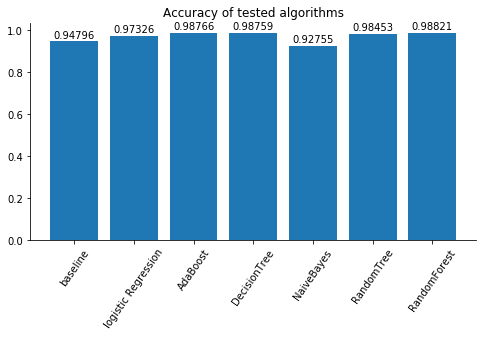

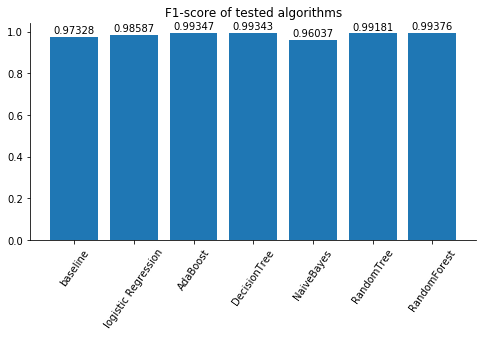

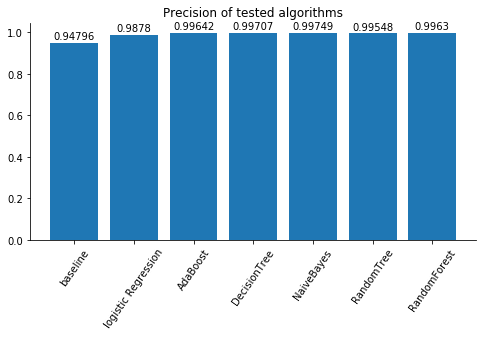

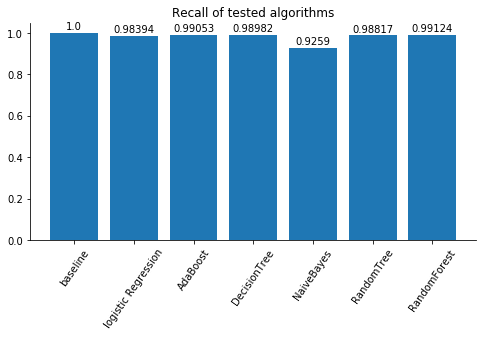

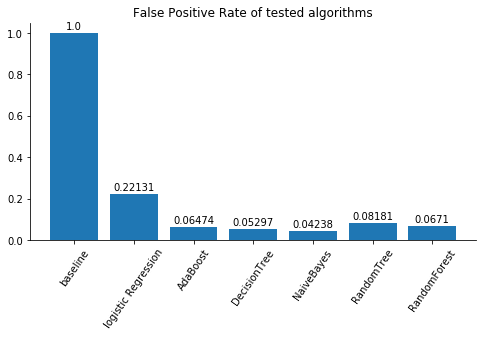

In [72]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

# Random Features for Large-Scale Kernel Machines

In [73]:
import numpy as np
import tensorflow as tf
import time

In [74]:
X_train.values.shape

(152339, 232)

In [75]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(    
    x={"features": X_train.values},    
    y=y_train,    
    batch_size=180,    
    num_epochs=None,    
    shuffle=False)

In [76]:
X_validate.shape

(32644, 232)

In [77]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_validate.values},
    y=y_validate,
    batch_size=X_validate.shape[0],
    num_epochs=1,
    shuffle=False)

In [78]:
X_test.shape

(32645, 232)

In [79]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test.values},
    y=y_test,
    batch_size=X_test.shape[0],
    num_epochs=1,
    shuffle=False)

## Using explicit kernel mappings with the linear model

In [80]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool", 
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                    "Conn state" : "Conn_state" 
                    }, inplace=True)

In [81]:
feat_column = tf.contrib.layers.real_valued_column('features', dimension=len(X_train.columns.values))

In [82]:
kernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(input_dim=len(X_train.columns.values), output_dim=5000, stddev=5, name='rffm')

In [83]:
kernel_mappers = {feat_column: [kernel_mapper]}

In [84]:
! rm -r kernel_train

rm: cannot remove 'kernel_train': No such file or directory


In [85]:
optimizer = tf.train.FtrlOptimizer(learning_rate=25, l2_regularization_strength=0.001)

In [86]:
estimator_kernel = tf.contrib.kernel_methods.KernelLinearClassifier(
    n_classes=2,
    optimizer=optimizer,
    kernel_mappers=kernel_mappers, 
    model_dir="kernel_train")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb06b7c82b0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'kernel_train'}


In [87]:
estimator_kernel.fit(input_fn=train_input_fn, steps=8000)

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into kernel_train/model.ckpt.
INFO:tensorflow:loss = 0.6931474, step = 1
INFO:tensorflow:global_step/sec: 39.2213
INFO:tensorflow:loss = 0.07988095, step = 101 (2.553 sec)
INFO:tensorflow:global_step/sec: 37.7658
INFO:tensorflow:loss = 0.057781372, step = 201 (2.650 sec)
INFO:tensorflow:global_step/sec: 37.0683
INFO:tensorflow:loss = 0.053050008, step = 301 (2.696 sec)
INFO:tensorflow:global_step/sec: 38.1226
INFO:tensorflow:loss = 0.0719365, step = 401 (2.626 sec)
INFO:tensorflow:global_step/sec: 38.636
INFO:tensorflow:loss = 0.0131801

INFO:tensorflow:loss = 0.004632634, step = 6801 (2.513 sec)
INFO:tensorflow:global_step/sec: 39.8526
INFO:tensorflow:loss = 0.003310326, step = 6901 (2.509 sec)
INFO:tensorflow:global_step/sec: 39.4654
INFO:tensorflow:loss = 0.008506696, step = 7001 (2.533 sec)
INFO:tensorflow:global_step/sec: 40.3279
INFO:tensorflow:loss = 0.002865299, step = 7101 (2.480 sec)
INFO:tensorflow:global_step/sec: 42.1691
INFO:tensorflow:loss = 0.0029055132, step = 7201 (2.371 sec)
INFO:tensorflow:global_step/sec: 40.8643
INFO:tensorflow:loss = 0.007042889, step = 7301 (2.447 sec)
INFO:tensorflow:global_step/sec: 42.0228
INFO:tensorflow:loss = 0.004217498, step = 7401 (2.379 sec)
INFO:tensorflow:global_step/sec: 38.8968
INFO:tensorflow:loss = 0.007053073, step = 7501 (2.571 sec)
INFO:tensorflow:global_step/sec: 38.0795
INFO:tensorflow:loss = 0.033244506, step = 7601 (2.626 sec)
INFO:tensorflow:global_step/sec: 33.3364
INFO:tensorflow:loss = 0.008842484, step = 7701 (3.002 sec)
INFO:tensorflow:global_step/se

KernelLinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7fb06b7cfdd8>, 'feature_columns': {_RealValuedColumn(column_name='features_MAPPED', dimension=5000, default_value=None, dtype=tf.float32, normalizer=None)}, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x7fb0339eba20>, 'kernel_mappers': {_RealValuedColumn(column_name='features', dimension=232, default_value=None, dtype=tf.float32, normalizer=None): [<tensorflow.contrib.kernel_methods.python.mappers.random_fourier_features.RandomFourierFeatureMapper object at 0x7fb062d3e940>]}})

In [88]:
eval_metrics = estimator_kernel.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2019-05-21-18:38:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-05-21-18:38:17
INFO:tensorflow:Saving dict for global step 8000: accuracy = 0.9984377, accuracy/baseline_label_mean = 0.2973594, accuracy/threshold_0.500000_mean = 0.9984377, auc = 0.99984205, auc_precision_recall = 0.9995945, global_step = 8000, labels/actual_label_mean = 0.2973594, labels/prediction_mean = 0.29789275, loss = 0.006917704, precision/positive_threshold_0.500000_mean = 0.9954844, recall/positive_threshold_0.500000_mean = 0.99927884


In [89]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.9984377
accuracy/baseline_label_mean: 0.2973594
accuracy/threshold_0.500000_mean: 0.9984377
auc: 0.99984205
auc_precision_recall: 0.9995945
global_step: 8000
labels/actual_label_mean: 0.2973594
labels/prediction_mean: 0.29789275
loss: 0.006917704
precision/positive_threshold_0.500000_mean: 0.9954844
recall/positive_threshold_0.500000_mean: 0.99927884


In [90]:
correctness = []
class_id = []
pred_iterator = None

In [91]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [92]:
for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])
    #print(pred_dict)

In [93]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test, class_id)
F1S[name] = metrics.f1_score(y_test, class_id)
Prec[name] = metrics.precision_score(y_test, class_id)
Rec[name] = metrics.recall_score(y_test, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, class_id).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

RFFM Accuracy: 0.99393, F1-score: 0.99681, Precision: 0.99514, Recall: 0.99848, FPR: 0.08888
TN: 1548; FP: 151; FN:   47; TP: 30899



# Neural network part

In [94]:
import collections
import io
import math
import tensorflow as tf
from IPython import display

In [95]:
deep_numeric_feat = ["Same_srv_rate", "Serror_rate", "Srv_serror_rate", "Dst_host_count", "Dst_host_srv_count", "Dst_host_same_src_port_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "well_known_src_pool", "registered_src_pool", "cli_src_pool"]
wide_numeric_feat = ["conn_len",  "src_bytes", "dst_bytes", "conn_numb"]
categorical_feat = ["service", "Conn_state", "src_port", "dst_port", "proto"]

In [96]:
deep_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in deep_numeric_feat]
wide_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in wide_numeric_feat]

In [97]:
src_port_mod = ["src_" + s for s in data["src_port"].unique().tolist()]
src_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'src_port', src_port_mod)

dst_port_mod = ["dst_" + s for s in data["dst_port"].unique().tolist()]
dst_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'dst_port', dst_port_mod)

service = tf.feature_column.categorical_column_with_vocabulary_list(
    'service', data["service"].unique().tolist())

Conn_state = tf.feature_column.categorical_column_with_vocabulary_list(
    'Conn_state', data["Conn_state"].unique().tolist())

proto = tf.feature_column.categorical_column_with_vocabulary_list(
    'proto', data["proto"].unique().tolist())

In [98]:
deep_columns = [
    tf.feature_column.indicator_column(service),
    tf.feature_column.indicator_column(Conn_state),
    tf.feature_column.indicator_column(proto),
    tf.feature_column.embedding_column(src_port, dimension=10),
    tf.feature_column.embedding_column(dst_port, dimension=6),
]

In [99]:
crossed_columns = [
      tf.feature_column.crossed_column(
          ['src_port', 'service'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['dst_port', 'service'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'src_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'dst_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['dst_port', 'conn_numb'], hash_bucket_size=10000),  
      tf.feature_column.crossed_column(
          ['service', 'proto'], hash_bucket_size=100),
    
  ]

In [100]:
! rm -r NN_model

In [101]:
NN_model = tf.estimator.DNNLinearCombinedClassifier(
    model_dir = "/home/matz/Desktop/ml_ids/NN_model",
    linear_optimizer = tf.train.FtrlOptimizer(learning_rate=3, l2_regularization_strength=0.001),
    linear_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf + crossed_columns,
    dnn_activation_fn=tf.nn.selu,
    dnn_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf,
    dnn_hidden_units = [950, 550, 300, 175]
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/home/matz/Desktop/ml_ids/NN_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb04ab31860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [102]:
feature_set= deep_numeric_feat + wide_numeric_feat + categorical_feat

In [103]:
def get_input_fn(data_set, num_epochs=None, n_batch = 256, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in feature_set}),
       y = pd.Series(data_set["attack_flag"].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [104]:
NN_model.train(input_fn=get_input_fn(train_ex, n_batch=180), steps=20000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /home/matz/Desktop/ml_ids/NN_model/model.ckpt.
INFO:tensorflow:loss = 446.25497, step = 1
INFO:tensorflow:global_step/sec: 17.5245
INFO:tensorflow:loss = 51.913696, step = 101 (5.710 sec)
INFO:tensorflow:global_step/sec: 24.5251
INFO:tensorflow:loss = 62.83444, step = 201 (4.077 sec)
INFO:tensorflow:global_step/sec: 24.2819
INFO:tensorflow:loss = 0.014507753, step = 301 (4.118 sec)
INFO:tensorflow:global_step/sec: 73.3769
INFO:tensorflow:loss = 89.71296, step = 401 (1.359 sec)
INFO:tensorflow:global_step/sec: 80.7909
INFO:tensorflow:loss = 0.26437634, step = 501 (1.238 sec)
INFO:tensorflow:global_step/sec: 79.6

INFO:tensorflow:loss = 0.071939446, step = 7601 (1.513 sec)
INFO:tensorflow:global_step/sec: 69.413
INFO:tensorflow:loss = 0.0005684068, step = 7701 (1.442 sec)
INFO:tensorflow:global_step/sec: 64.3977
INFO:tensorflow:loss = 0.0015427741, step = 7801 (1.551 sec)
INFO:tensorflow:global_step/sec: 66.9157
INFO:tensorflow:loss = 0.0066183372, step = 7901 (1.495 sec)
INFO:tensorflow:global_step/sec: 64.8892
INFO:tensorflow:loss = 1.2349572, step = 8001 (1.541 sec)
INFO:tensorflow:global_step/sec: 65.5347
INFO:tensorflow:loss = 59.278347, step = 8101 (1.527 sec)
INFO:tensorflow:global_step/sec: 65.9787
INFO:tensorflow:loss = 0.25332236, step = 8201 (1.515 sec)
INFO:tensorflow:global_step/sec: 65.3384
INFO:tensorflow:loss = 15080.458, step = 8301 (1.530 sec)
INFO:tensorflow:global_step/sec: 68.5605
INFO:tensorflow:loss = 0.0014238227, step = 8401 (1.459 sec)
INFO:tensorflow:global_step/sec: 66.5151
INFO:tensorflow:loss = 0.003105941, step = 8501 (1.504 sec)
INFO:tensorflow:global_step/sec: 67

INFO:tensorflow:global_step/sec: 56.3925
INFO:tensorflow:loss = 1.5581081, step = 15801 (1.773 sec)
INFO:tensorflow:global_step/sec: 58.7615
INFO:tensorflow:loss = 23.79987, step = 15901 (1.703 sec)
INFO:tensorflow:global_step/sec: 60.0928
INFO:tensorflow:loss = 0.012343083, step = 16001 (1.664 sec)
INFO:tensorflow:global_step/sec: 73.7622
INFO:tensorflow:loss = 9.471835, step = 16101 (1.355 sec)
INFO:tensorflow:global_step/sec: 78.0219
INFO:tensorflow:loss = 0.0038180386, step = 16201 (1.282 sec)
INFO:tensorflow:global_step/sec: 75.7853
INFO:tensorflow:loss = 0.00448843, step = 16301 (1.320 sec)
INFO:tensorflow:global_step/sec: 68.5074
INFO:tensorflow:loss = 0.0017236065, step = 16401 (1.460 sec)
INFO:tensorflow:global_step/sec: 71.6445
INFO:tensorflow:loss = 0.7430438, step = 16501 (1.396 sec)
INFO:tensorflow:global_step/sec: 63.3228
INFO:tensorflow:loss = 0.27405816, step = 16601 (1.579 sec)
INFO:tensorflow:global_step/sec: 72.0331
INFO:tensorflow:loss = 7.049935, step = 16701 (1.38

In [105]:
eval_metrics = NN_model.evaluate(input_fn=get_input_fn(validate_ex, n_batch=validate_ex.shape[0], shuffle=False), steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-21-18:43:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-05-21-18:43:52
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.99705917, accuracy_baseline = 0.7026406, auc = 0.9984373, auc_precision_recall = 0.9980652, average_loss = 0.061851874, global_step = 20000, label/mean = 0.2973594, loss = 2019.0925, precision = 0.99648726, prediction/mean = 0.2962457, recall = 0.9936129
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000


In [106]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.99705917
accuracy_baseline: 0.7026406
auc: 0.9984373
auc_precision_recall: 0.9980652
average_loss: 0.061851874
global_step: 20000
label/mean: 0.2973594
loss: 2019.0925
precision: 0.99648726
prediction/mean: 0.2962457
recall: 0.9936129


In [107]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_ex, num_epochs=1, n_batch = test_ex.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [108]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])

y_pred_NN = [int(a) for a in y_pred]

In [109]:
from sklearn import metrics
name = "NN"

Acc[name] = metrics.accuracy_score(test_ex["attack_flag"], y_pred_NN)
F1S[name] = metrics.f1_score(test_ex["attack_flag"], y_pred_NN)
Prec[name] = metrics.precision_score(test_ex["attack_flag"], y_pred_NN)
Rec[name] = metrics.recall_score(test_ex["attack_flag"], y_pred_NN)
tn, fp, fn, tp = metrics.confusion_matrix(test_ex["attack_flag"], y_pred_NN).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

NN Accuracy: 0.98422, F1-score: 0.99165, Precision: 0.99489, Recall: 0.98843, FPR: 0.09241
TN: 1542; FP: 157; FN:  358; TP: 30588



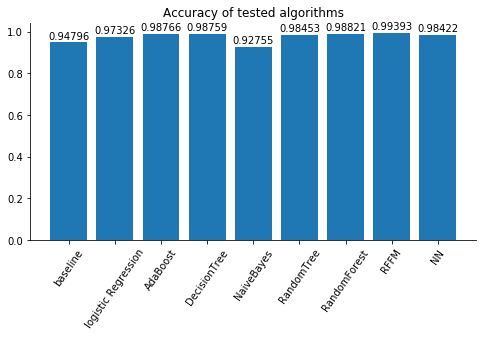

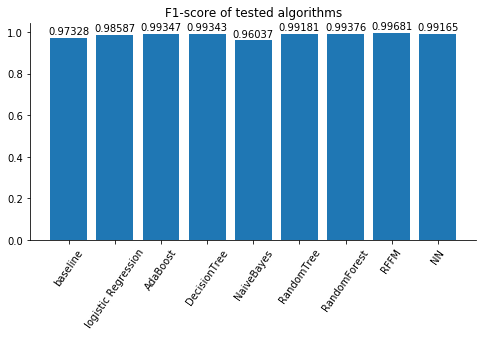

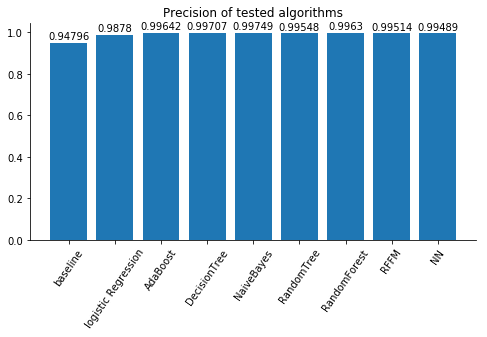

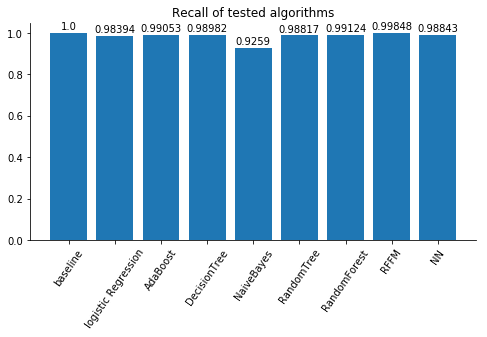

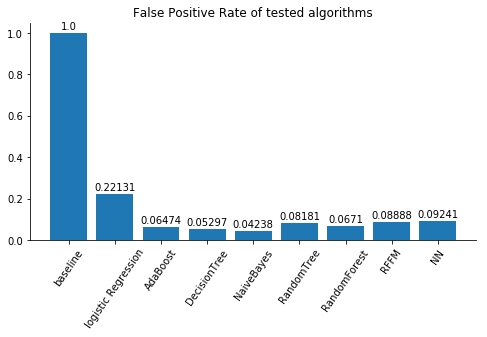

In [110]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Results comparison

In [115]:
y_pred = {}

In [116]:
y_pred["RFFM"] = class_id
y_pred["NN"] = y_pred_NN

In [117]:
# Metrics of baseline method

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred["baseline"] = np.ones(len(y_test)).ravel() 
else:
    y_pred["baseline"] = np.zeros(len(y_test)).ravel()
        
y_pred["baseline"] = y_pred["baseline"].astype(int)

In [118]:
classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 14),
               "RandomForest":RandomForestClassifier(n_estimators=178, max_depth=31, random_state=0),
              }

name = "LogisticReg"
model = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
y_pred[name] = model.predict(X_test)

for name, clf in classifiers.items():
    
    model = clf.fit(X_train_alg, y_train_alg)
    
    y_pred[name] = model.predict(X_test)

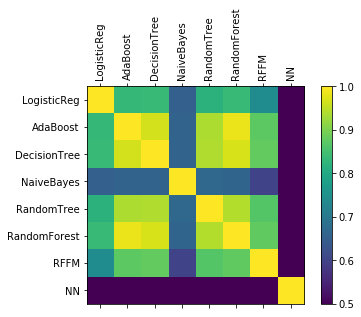

In [119]:
y_pred_pand = pd.DataFrame.from_dict(y_pred)
names = ["LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "NN"]
correlations = y_pred_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0.5, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [120]:
print(correlations)

              LogisticReg  AdaBoost  DecisionTree  NaiveBayes  RandomTree  \
LogisticReg      1.000000  0.832713      0.837733    0.654069    0.820830   
AdaBoost         0.832713  1.000000      0.964890    0.659080    0.939231   
DecisionTree     0.837733  0.964890      1.000000    0.659435    0.940381   
NaiveBayes       0.654069  0.659080      0.659435    1.000000    0.667417   
RandomTree       0.820830  0.939231      0.940381    0.667417    1.000000   
RandomForest     0.838041  0.985248      0.970412    0.661779    0.942927   
RFFM             0.742618  0.874041      0.879714    0.599979    0.867165   
NN              -0.001099 -0.003542     -0.003322   -0.000061   -0.005607   

              RandomForest      RFFM        NN  
LogisticReg       0.838041  0.742618 -0.001099  
AdaBoost          0.985248  0.874041 -0.003542  
DecisionTree      0.970412  0.879714 -0.003322  
NaiveBayes        0.661779  0.599979 -0.000061  
RandomTree        0.942927  0.867165 -0.005607  
RandomForest

In [121]:
failures = {}
failures["baseline"] = []
failures["LogisticReg"] = []
failures["AdaBoost"] = []
failures["DecisionTree"] = []
failures["NaiveBayes"] = []
failures["RandomTree"] = []
failures["RandomForest"] = []
failures["RFFM"] = []
failures["NN"] = []

for i in range(0, len(y_test)):
    for key in y_pred.keys():
        if y_pred[key][i] != y_test[i]:
            failures[key].append(10)
        else:
            failures[key].append(1)

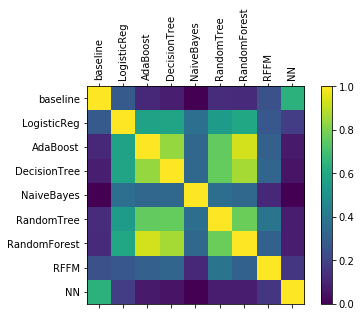

In [122]:
failures_pand = pd.DataFrame.from_dict(failures)
names = ["baseline", "LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "NN"]
correlations = failures_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [123]:
print(correlations)

              baseline  LogisticReg  AdaBoost  DecisionTree  NaiveBayes  \
baseline      1.000000     0.282582  0.113689      0.085872   -0.027178   
LogisticReg   0.282582     1.000000  0.576444      0.585238    0.363861   
AdaBoost      0.113689     0.576444  1.000000      0.842108    0.331548   
DecisionTree  0.085872     0.585238  0.842108      1.000000    0.333787   
NaiveBayes   -0.027178     0.363861  0.331548      0.333787    1.000000   
RandomTree    0.125962     0.551572  0.761525      0.764081    0.359473   
RandomForest  0.120036     0.593966  0.933454      0.864464    0.337259   
RFFM          0.249906     0.270729  0.305691      0.326287    0.112101   
NN            0.643578     0.182980  0.071548      0.053995   -0.015883   

              RandomTree  RandomForest      RFFM        NN  
baseline        0.125962      0.120036  0.249906  0.643578  
LogisticReg     0.551572      0.593966  0.270729  0.182980  
AdaBoost        0.761525      0.933454  0.305691  0.071548  
Decis

In [124]:
cont_table = [[],[]]
for name in failures.keys():
    print(Counter(failures[name]))
    cont_table[0].append(float(Counter(failures[name])[1]))
    cont_table[1].append(float(Counter(failures[name])[10]))
print(cont_table)

Counter({1: 30946, 10: 1699})
Counter({1: 31772, 10: 873})
Counter({1: 32242, 10: 403})
Counter({1: 32240, 10: 405})
Counter({1: 30280, 10: 2365})
Counter({1: 32140, 10: 505})
Counter({1: 32260, 10: 385})
Counter({1: 32447, 10: 198})
Counter({1: 29234, 10: 3411})
[[30946.0, 31772.0, 32242.0, 32240.0, 30280.0, 32140.0, 32260.0, 32447.0, 29234.0], [1699.0, 873.0, 403.0, 405.0, 2365.0, 505.0, 385.0, 198.0, 3411.0]]


In [125]:
from scipy import stats

# test of independence
# H0 : results are independent

stat, p, dof, expected = stats.chi2_contingency(cont_table)
stats.chi2_contingency(cont_table)
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('\nreject H0 - results dependent')
else:
    print('\nfailed to reject H0 - results independent')

probability=0.950, critical=15.507, stat=9090.111

reject H0 - results dependent


## New data prediction

In [126]:
test_set = pd.read_csv("20151221.txt", sep = "\t", header = None)
test_set.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(test_set["attack_flag"]))

Counter({-1: 210159, 1: 2830})


In [127]:
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-2, -1)
test_set.loc[:, "attack_flag"] = test_set.loc[:, "attack_flag"] * -1
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(test_set["attack_flag"]))

Counter({1: 210159, 0: 2830})


In [128]:
# slice dataset, drop additional features
print(test_set.shape)
test_set = test_set.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(test_set.shape)

# drop software markers
test_set = test_set.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
test_set["attack_flag"].value_counts()

(212989, 24)
(212989, 21)


1    210159
0      2830
Name: attack_flag, dtype: int64

In [129]:
# removing NaNs
test_set = test_set.dropna()
test_set.shape

(212989, 18)

In [130]:
test_set["well-known src pool"] = test_set.apply(wk, axis=1)
test_set["registered src pool"] = test_set.apply(reg, axis=1)
test_set["cli src pool"] = test_set.apply(cli, axis=1)

In [131]:
test_set["src port"] = test_set["src port"].apply(str)
test_set["dst port"] = test_set["dst port"].apply(str)
test_set['src port'].nunique()
test_set['dst port'].nunique()

thresh1 = 125
thresh2 = 125
counts1 = test_set['src port'].value_counts()
counts2 = test_set['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [132]:
### hot one encoding ###

# hot one encoding for service
test_set = pd.concat([test_set, pd.get_dummies(test_set["service"], prefix="is")], axis=1)
test_set.tail(10)

#hot one encoding for proto - commented due to reduced column number
test_set = pd.concat([test_set, pd.get_dummies(test_set["proto"], prefix="is")], axis=1)
test_set.tail(10)

# hot one encoding for conn state
test_set = pd.concat([test_set, pd.get_dummies(test_set["Conn state"], prefix="state")], axis=1)
test_set.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_OTH,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SHR
212979,0.000061,other,0,0,20,1.0,0.05,0.15,2,85,...,0,1,0,0,0,0,0,0,0,0
212980,0.000000,other,0,0,1,1.0,0.00,0.22,4,6,...,0,0,0,0,0,0,1,0,0,0
212981,0.000013,other,0,0,13,1.0,0.08,0.26,6,84,...,0,1,0,0,0,0,0,0,0,0
212982,0.000029,other,0,0,2,1.0,0.50,0.25,1,6,...,0,1,0,0,0,0,0,0,0,0
212983,0.000039,other,0,0,14,1.0,0.07,0.24,1,84,...,0,1,0,0,0,0,0,0,0,0
212984,0.000045,other,0,0,15,1.0,0.07,0.23,3,84,...,0,1,0,0,0,0,0,0,0,0
212985,0.000053,other,0,0,16,1.0,0.06,0.22,19,84,...,0,1,0,0,0,0,0,0,0,0
212986,0.000056,other,0,0,17,1.0,0.06,0.21,7,84,...,0,1,0,0,0,0,0,0,0,0
212987,0.000058,other,0,0,18,1.0,0.06,0.20,20,84,...,0,1,0,0,0,0,0,0,0,0
212988,0.000110,dns,36,194,1,1.0,0.00,0.50,0,89,...,0,0,0,0,0,0,0,0,1,0


In [133]:
test_set.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

In [134]:
# check differences between datasets after hot one encoding

test_new_data_full = test_set
    
print(test_set.columns.difference(data.columns))  
test_set.shape

Index(['is_dns,sip', 'is_dst_102', 'is_dst_10200', 'is_dst_1081', 'is_dst_119',
       'is_dst_135', 'is_dst_143', 'is_dst_223', 'is_dst_389', 'is_dst_5432',
       'is_dst_6050', 'is_dst_631', 'is_dst_82', 'is_dst_88', 'is_dst_9080',
       'is_src_0', 'is_src_13941', 'is_src_18382', 'is_src_21320',
       'is_src_22055', 'is_src_22206', 'is_src_22207', 'is_src_2295',
       'is_src_29174', 'is_src_300', 'is_src_37286', 'is_src_37396',
       'is_src_37511', 'is_src_38396', 'is_src_40082', 'is_src_40718',
       'is_src_41161', 'is_src_41287', 'is_src_41708', 'is_src_41793',
       'is_src_42206', 'is_src_443', 'is_src_4445', 'is_src_46432',
       'is_src_49354', 'is_src_49362', 'is_src_49376', 'is_src_49414',
       'is_src_5061', 'is_src_5071', 'is_src_5094', 'is_src_5100',
       'is_src_5114', 'is_src_51361', 'is_src_5187', 'is_src_5208',
       'is_src_5211', 'is_src_52131', 'is_src_5229', 'is_src_5247',
       'is_src_53265', 'is_src_53451', 'is_src_53762', 'is_src_54110',
    

(212989, 193)

In [135]:
test_new_data = test_set.loc[range(30000), :]

for c in data.columns.difference(test_new_data.columns):
    test_new_data[c] = 0
for c in test_new_data.columns.difference(data.columns):
    test_new_data = test_new_data.drop(c, axis=1)

test_new_data = test_new_data.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
    
test_new_data = test_new_data.sample(frac=1)
y_test_new_data = test_new_data.loc[:, "attack_flag"].values.ravel()
X_test_new_data = test_new_data.drop(["attack_flag"], axis=1).astype(np.float32)

In [136]:
print(X_test_new_data.shape)
print(X_test.shape)
print(test_new_data["attack_flag"].value_counts())

(30000, 232)
(32645, 232)
1    29498
0      502
Name: attack_flag, dtype: int64


In [137]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test_new_data.mean() > (1-y_test_new_data.mean())):
    y_pred = np.ones(len(y_test_new_data)).ravel() 
else:
    y_pred = np.zeros(len(y_test_new_data)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.98327, F1-score: 0.99156, Precision: 0.98327, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 502; FN:    0; TP: 29498



In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test_new_data)

name = "logistic Regression"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.98183, F1-score: 0.99083, Precision: 0.98324, Recall: 0.99854, FPR: 1.00000
TN:   0; FP: 502; FN:   43; TP: 29455



In [139]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


seed = 12
num_trees = 28

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 14),
               "RandomForest":RandomForestClassifier(n_estimators=178, max_depth=31, random_state=0),
              }


for name, clf in classifiers.items():
    
    model = clf.fit(X_train_alg, y_train_alg)
    
    y_pred = model.predict(X_test_new_data)
    
    Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
    F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
    Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
    Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.98303, F1-score: 0.99144, Precision: 0.98329, Recall: 0.99973, FPR: 0.99801
TN:   1; FP: 501; FN:    8; TP: 29490

Algorithm: DecisionTree Accuracy: 0.98797, F1-score: 0.99388, Precision: 0.99363, Recall: 0.99414, FPR: 0.37450
TN: 314; FP: 188; FN:  173; TP: 29325

Algorithm: NaiveBayes   Accuracy: 0.98320, F1-score: 0.99153, Precision: 0.98327, Recall: 0.99993, FPR: 1.00000
TN:   0; FP: 502; FN:    2; TP: 29496

Algorithm: RandomTree   Accuracy: 0.95203, F1-score: 0.97543, Precision: 0.98279, Recall: 0.96817, FPR: 0.99602
TN:   2; FP: 500; FN:  939; TP: 28559

Algorithm: RandomForest Accuracy: 0.95560, F1-score: 0.97730, Precision: 0.98279, Recall: 0.97186, FPR: 1.00000
TN:   0; FP: 502; FN:  830; TP: 28668



In [140]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test_new_data.values},
    y=y_test_new_data,
    batch_size=X_test_new_data.shape[0],
    num_epochs=1,
    shuffle=False)

In [141]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [142]:
class_id = []

for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])

In [143]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test_new_data, class_id)
F1S[name] = metrics.f1_score(y_test_new_data, class_id)
Prec[name] = metrics.precision_score(y_test_new_data, class_id)
Rec[name] = metrics.recall_score(y_test_new_data, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, class_id).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

RFFM Accuracy: 0.99037, F1-score: 0.99512, Precision: 0.99198, Recall: 0.99827, FPR: 0.47410
TN: 264; FP: 238; FN:   51; TP: 29447



In [144]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_new_data_full.loc[range(30000), :], num_epochs=1, n_batch = X_test.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [145]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])

In [146]:
name = "NN"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

NN Accuracy: 0.96777, F1-score: 0.98361, Precision: 0.98340, Recall: 0.98383, FPR: 0.97610
TN:  12; FP: 490; FN:  477; TP: 29021



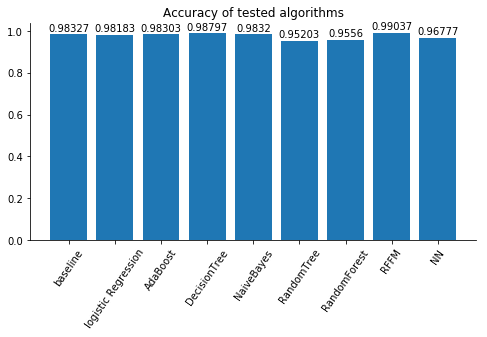

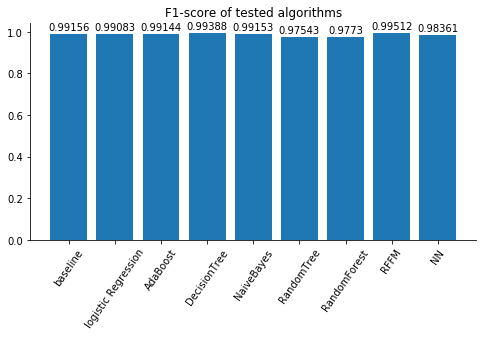

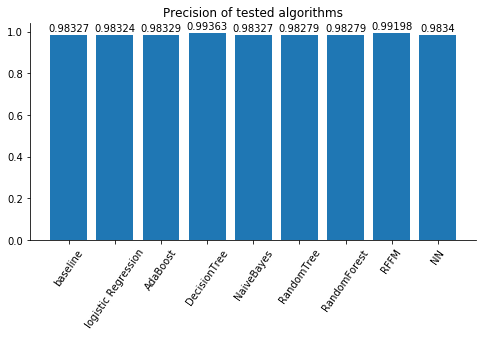

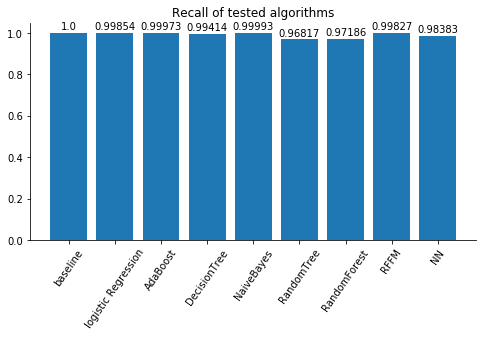

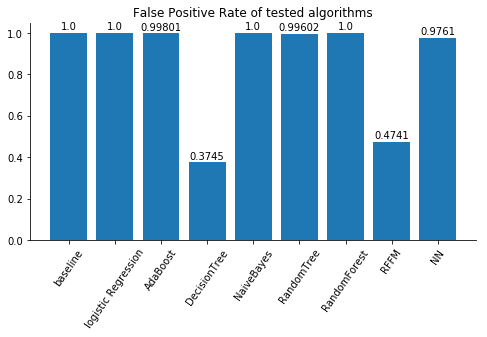

In [147]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)